In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
%matplotlib inline

In [2]:
data_set_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(filepath_or_buffer=data_set_path, header=None, sep=',')
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# add redable columns names
df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

In [4]:
# check if any null/NaN values
print(df.isnull().values.any())

False


In [5]:
df.dropna(how="all", inplace=True)

In [6]:
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
X = df.iloc[:, 0:4] # all the features
y = df.iloc[:, 4] # folower species class column

In [8]:
print(X.head)
print(y.head)

<bound method NDFrame.head of      sepal_len  sepal_wid  petal_len  petal_wid
0          5.1        3.5        1.4        0.2
1          4.9        3.0        1.4        0.2
2          4.7        3.2        1.3        0.2
3          4.6        3.1        1.5        0.2
4          5.0        3.6        1.4        0.2
..         ...        ...        ...        ...
145        6.7        3.0        5.2        2.3
146        6.3        2.5        5.0        1.9
147        6.5        3.0        5.2        2.0
148        6.2        3.4        5.4        2.3
149        5.9        3.0        5.1        1.8

[150 rows x 4 columns]>
<bound method NDFrame.head of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object>


In [25]:
print(X.shape, y.shape)

(150, 4) (150,)


In [11]:
# for PCA, the data needs to be standardized (mean=0, std=1), 
# since PCA is depedanct on variance and variance is heavily dependent on scaling
X_std = StandardScaler().fit_transform(X)
X_std[4:8], X_std.shape

(array([[-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
        [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
        [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
        [-1.02184904,  0.80065426, -1.2844067 , -1.31297673]]),
 (150, 4))

In [10]:
# using numpy to caluculate covriance matrix
print('Covariance matrix \n')
cov_mat = np.cov(X_std, rowvar=False)
cov_mat

Covariance matrix 



array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [38]:
# caluculate eigen vectors and eigen values using linalg from numpy.
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [51]:
# verify the eigne vectors
sq_eig=[]
for i in eig_vecs:
    sq_eig.append(i**2)
    sum(sq_eig)

print("sum of squares of each values in an eigen vector is \n", sum(sq_eig))

for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

sum of squares of each values in an eigen vector is 
 [1. 1. 1. 1.]


In [58]:
eig_pairs = []
for i in range(len(eig_vals)):
    eig_pairs.append([(np.abs(eig_vals[i]), eig_vecs[:,i])])
print(type(eig_pairs))
for i in eig_pairs:
    print(i)

<class 'list'>
[(2.9303537755893165, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105]))]
[(0.9274036215173417, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577]))]
[(0.1483422264816399, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ]))]
[(0.02074601399559571, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]


In [59]:
eig_pairs.sort()
for i in eig_pairs:
    print(i)

[(0.02074601399559571, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]
[(0.1483422264816399, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ]))]
[(0.9274036215173417, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577]))]
[(2.9303537755893165, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105]))]


In [66]:
# sort the eigen values, to choose the required Principal Components.
eig_pairs.reverse()
for i in eig_pairs:
    print(i)

[(0.02074601399559571, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]
[(0.1483422264816399, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ]))]
[(0.9274036215173417, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577]))]
[(2.9303537755893165, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105]))]


In [63]:
# The explained variance tells us how much information (variance) can
# be attributed to each of the principal components.
tot = sum(eig_vals) 
print("\n",tot) 
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("\n\n1. Variance Explained\n",var_exp) 
cum_var_exp = np.cumsum(var_exp)
print("\n\n2. Cumulative Variance Explained\n",cum_var_exp)
print("\n\n3. Percentage of variance the first two principal components each contain\n ",var_exp[0:2]) 
print("\n\n4. Percentage of variance the first two principal components together contain\n",sum(var_exp[0:2]))


 4.026845637583894


1. Variance Explained
 [72.77045209380134, 23.030523267680643, 3.683831957627389, 0.5151926808906266]


2. Cumulative Variance Explained
 [ 72.77045209  95.80097536  99.48480732 100.        ]


3. Percentage of variance the first two principal components each contain
  [72.77045209380134, 23.030523267680643]


4. Percentage of variance the first two principal components together contain
 95.80097536148199


In [87]:
# the first two eigen values are considered, thus we try to reduce the dimensions from 4 to 2.
for i in eig_pairs[0]:
    print(i[1])
for i in eig_pairs[1]:
    print(i[1])
#print(eig_pairs[1])

[ 0.26199559 -0.12413481 -0.80115427  0.52354627]
[-0.72101681  0.24203288  0.14089226  0.6338014 ]


In [91]:
martix_r1 = []
for i in eig_pairs[0]:
    martix_r1 = i[1]
martix_r2 = []
for i in eig_pairs[1]:
    martix_r2 = i[1]
matrix_w = np.hstack((martix_r1.reshape(4,1), martix_r2.reshape(4,1)))
#hstack: Stacks arrays in sequence horizontally (column wise).
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.26199559 -0.72101681]
 [-0.12413481  0.24203288]
 [-0.80115427  0.14089226]
 [ 0.52354627  0.6338014 ]]


In [92]:
# construct the new features using the PCA projection matrix.
Y = X_std.dot(matrix_w) 
principalDf = pd.DataFrame(data = Y , columns = ['principal component 1', 'principal component 2']) 
principalDf.head()

,principal component 1,principal component 2
0,0.023073,-0.121943
1,0.103208,-0.227251
2,0.027825,0.051480
3,-0.066311,0.098860
4,-0.037397,0.021428


In [106]:
# get the final data with new features.
finalDf = pd.concat([principalDf, pd.DataFrame(y,columns = ['class'])], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


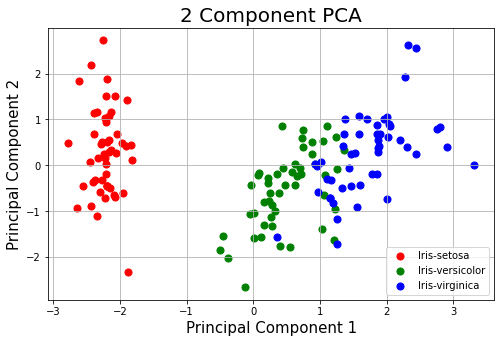

In [109]:
# plotting the data based on the class with new PCA features
def plot_pca(df):
    fig = plt.figure(figsize = (8,5))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 Component PCA', fontsize = 20) 
    targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors): 
        indicesToKeep = finalDf['class'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'] , finalDf.loc[indicesToKeep, 'principal component 2'] , c = color , s = 50)
        ax.legend(targets)
        ax.grid()
plot_pca(finalDf)

In [110]:
# Creating PCA by directly using Python libraries.
"""
Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). 
.95 means that we want to include 95% of the variance. 
Hence PCA will return the no of components which describe 95% of the variance. 
However we know from above computation that 2 components are enough so we have passed the 2 components.
"""
pca = PCA(n_components=2)
# use the standadirzed data
principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
finalDf_new = pd.concat([principalDf, finalDf[['class']]], axis = 1)
finalDf_new.head(5)

,principal component 1,principal component 2,class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


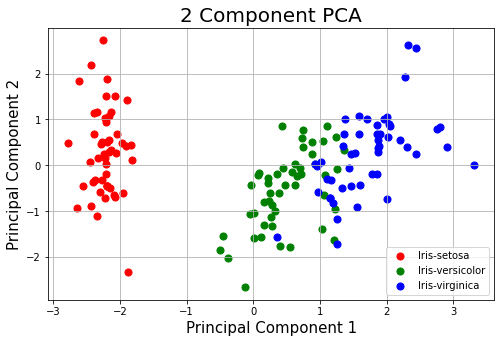

In [111]:
plot_pca(finalDf_new)

In [113]:
print("BEFORE PCA - ", df.shape)
print("AFTER PCA - ", finalDf_new.shape)

BEFORE PCA -  (150, 5)
AFTER PCA -  (150, 3)
